## Observations and Insights 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [54]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [59]:
# Checking the number of mice.
unique_mice = mouse_metadata["Mouse ID"]
mouse_metadata["Mouse ID"].unique
len(unique_mice)

249

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
gp = study_results.groupby(["Mouse ID"])
study_results.groupby(["Mouse ID"])
gp.count()
study_results["is duplicated"] = study_results.duplicated(subset=['Mouse ID', 'Timepoint'])
study_results[study_results["is duplicated"] == False]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,is duplicated
0,b128,0,45.000000,0,False
1,f932,0,45.000000,0,False
2,g107,0,45.000000,0,False
3,a457,0,45.000000,0,False
4,c819,0,45.000000,0,False
...,...,...,...,...,...
1888,r944,45,41.581521,2,False
1889,u364,45,31.023923,3,False
1890,p438,45,61.433892,1,False
1891,x773,45,58.634971,4,False


In [66]:
# Optional: Get all the data for the duplicate mouse ID.
study_results[study_results["is duplicated"] == True]




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,is duplicated
137,g989,0,45.000000,0,True
360,g989,5,47.570392,0,True
681,g989,10,49.880528,0,True
869,g989,15,53.442020,0,True
1111,g989,20,54.657650,1,True


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean_study_results = study_results[study_results["is duplicated"] == False]
df_clean_study_results



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,is duplicated
0,b128,0,45.000000,0,False
1,f932,0,45.000000,0,False
2,g107,0,45.000000,0,False
3,a457,0,45.000000,0,False
4,c819,0,45.000000,0,False
...,...,...,...,...,...
1888,r944,45,41.581521,2,False
1889,u364,45,31.023923,3,False
1890,p438,45,61.433892,1,False
1891,x773,45,58.634971,4,False


In [72]:
# Checking the number of mice in the clean DataFrame.
unique_mice = df_clean_study_results["Mouse ID"].unique()
len(unique_mice)


249

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
merge_table = df_clean_study_results.merge(mouse_metadata, on = 'Mouse ID', how = 'inner')
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [76]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")


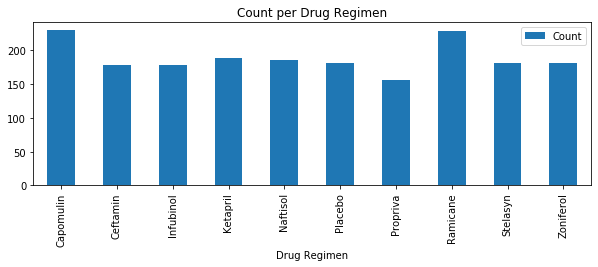

<Figure size 432x288 with 0 Axes>

In [77]:
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [34]:
import matplotlib.pyplot as plt

# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# select column to convert to list here
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [35]:
# Convert regimen count into a list
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [36]:
x_axis = np.arange(len(regimen_count))

<BarContainer object of 10 artists>

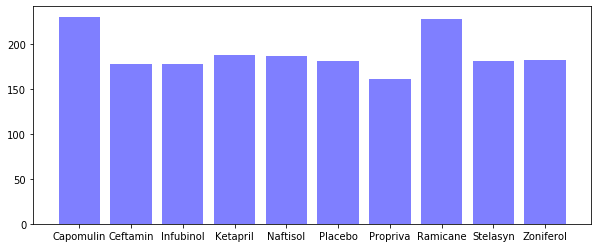

In [37]:
# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()


,Sex,Count
0,Female,935
1,Male,958


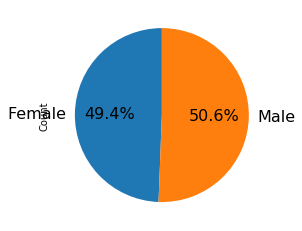

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax1 = plt.subplots()
# plt.figure(figsize=(10,6))
# ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)


In [80]:
plt.clf()
plt.cla()
plt.close()

In [84]:
import matplotlib.pyplot as plt
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[930, 958]

([<matplotlib.patches.Wedge at 0x2b975be02c8>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Females'),
  Text(0.7265029524204479, 0.8259500348836922, 'Males')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

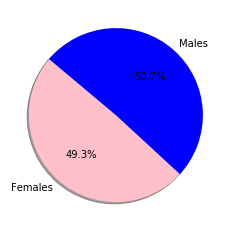

In [85]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [44]:
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

## Quartiles, Outliers and Boxplots

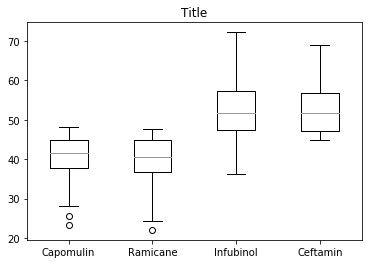

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
#study_results[study_results["is duplicated"] == False]
#merge_table[merge_table["Drug Regimen"] == "Capomulin"]
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = merge_table[merge_table["Drug Regimen"] == "Capomulin"]
Ramicane = merge_table[merge_table["Drug Regimen"] == "Ramicane"]
Infubinol = merge_table[merge_table["Drug Regimen"] == "Infubinol"]
Ceftamin = merge_table[merge_table["Drug Regimen"] == "Ceftamin"]
Capomulin
# Start by getting the last (greatest) timepoint for each mouse
data = [Capomulin["Tumor Volume (mm3)"], Ramicane["Tumor Volume (mm3)"],Infubinol["Tumor Volume (mm3)"],Ceftamin["Tumor Volume (mm3)"]]
fig, ax = plt.subplots()
ax.set_title('Title')
ax.boxplot(data, labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


## Line and Scatter Plots

In [102]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
# Create a new DataFrame that looks into Capomulin
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,is duplicated,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,False,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,False,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,False,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,False,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,False,Capomulin,Female,9,22


In [103]:
# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,is duplicated,Drug Regimen,Sex,Age_months,Weight (g)
28,1686,s185,0,45.000000,0,False,Capomulin,Female,3,17
29,1687,s185,5,43.878496,0,False,Capomulin,Female,3,17
30,1688,s185,10,37.614948,0,False,Capomulin,Female,3,17
31,1689,s185,15,38.177232,0,False,Capomulin,Female,3,17
32,1690,s185,20,36.866876,0,False,Capomulin,Female,3,17
33,1691,s185,25,33.949940,0,False,Capomulin,Female,3,17
34,1692,s185,30,32.959671,1,False,Capomulin,Female,3,17
35,1693,s185,35,28.328531,1,False,Capomulin,Female,3,17
36,1694,s185,40,25.472143,1,False,Capomulin,Female,3,17
37,1695,s185,45,23.343598,1,False,Capomulin,Female,3,17


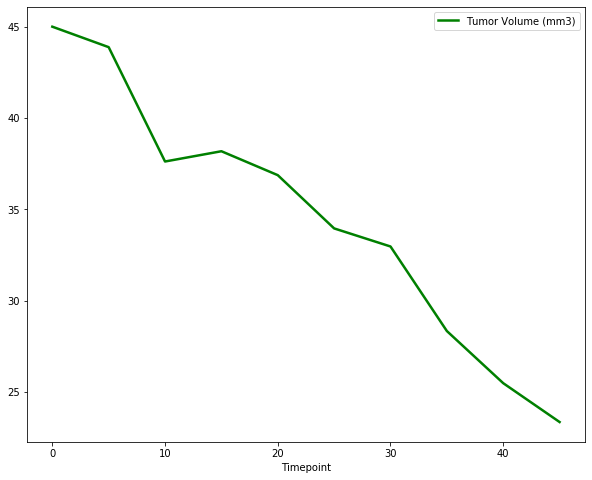

In [104]:
# Selecting only 2 columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

In [107]:
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,is duplicated,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,False,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,False,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,False,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,False,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,False,Capomulin,Female,9,22


In [108]:
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.000000
1,b128,22,45.651331
2,b128,22,43.270852
3,b128,22,43.784893
4,b128,22,42.731552


In [109]:
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [115]:
# Rename Tumor Volume column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


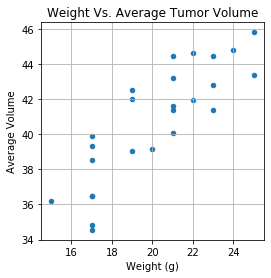

In [118]:
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [114]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [119]:
# Calculate the correlation coefficient and linear regression model 
import matplotlib.pyplot as plt
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


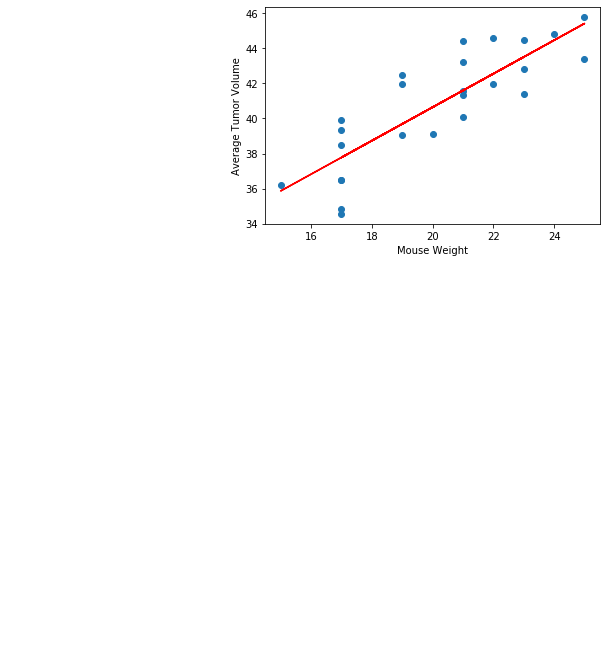

In [122]:
# Add the linear regression equation and line to plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()